# Introduction
Here we do a short test of learned model with fixed period 5. It has been initialized and learned on 2020-01-02 day data and after that it is tested on next day data. First part contains figure of PL change during 2 days learning. To compare performance of model there is figure that has been initialized and learned on second day only in second part.

In [1]:
import pandas as pd
import numpy as np
from pickle import load
import os 
os.chdir('../..')

## 1) Initialization on 01-02. Learned on 01-03

In [2]:
similarity = 90
height, width = 10, 5
window = 5
periods = range(5, 11)

Qmatrix_init = load(open(f'src/SPY_patterns_scanner/output/{similarity}/{width}x{height}/Q_matrix_{window}.pkl', 'rb'))
# Qmatrix_init['0pl_iter_0'] = 0

count_cols = [col for col in Qmatrix_init.columns if 'count' in col] 
pl_cols = [col for col in Qmatrix_init.columns if 'pl' in col]
# pl_cols[0] = '0pl_iter_0'

buy_cols = [col for col in Qmatrix_init.columns if 'buy' in col]
hold_cols = [col for col in Qmatrix_init.columns if 'hold' in col]
sell_cols = [col for col in Qmatrix_init.columns if 'sell' in col]

columns_to_show = (['date', 'prototype', 'code'] + buy_cols+hold_cols+sell_cols+count_cols+pl_cols).sort()

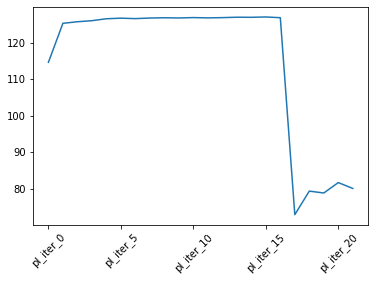

In [3]:
Qmatrix_init[pl_cols].sum().plot(rot=45);

In [4]:
Qmatrix_init[buy_cols + hold_cols + sell_cols]

,buy,hold,sell
0,-5.684342e-14,-0.001,11.19
1379,6.100000e-01,0.000,0.00
1444,1.200000e-01,0.000,0.00
1473,1.210000e+00,-0.020,-0.03
1504,-2.000000e-02,-0.010,1.82
...,...,...,...
54006,-1.000000e-02,-0.005,-0.01
54009,-5.000000e-02,-0.001,0.15
54012,-1.000000e-02,-0.005,-0.07
54015,-1.000000e-02,-0.001,0.00


In [5]:
Qmatrix_init[pl_cols].sum()

pl_iter_0     114.65
pl_iter_1     125.35
pl_iter_2     125.78
pl_iter_3     126.07
pl_iter_4     126.60
pl_iter_5     126.76
pl_iter_6     126.64
pl_iter_7     126.80
pl_iter_8     126.87
pl_iter_9     126.82
pl_iter_10    126.92
pl_iter_11    126.84
pl_iter_12    126.91
pl_iter_13    127.02
pl_iter_14    127.00
pl_iter_15    127.09
pl_iter_16    126.89
pl_iter_17     72.83
pl_iter_18     79.29
pl_iter_19     78.77
pl_iter_20     81.63
pl_iter_21     80.02
dtype: float64

In [6]:
Qmatrix_init[pl_cols].sum().max()

127.08999999999668

## 2)Initialization on 01-03

In [7]:
Qmatrix_03 = load(open(f'src/SPY_patterns_scanner/output/{similarity}/{width}x{height}/Q_matrix_{window}_03day_init.pkl', 'rb'))

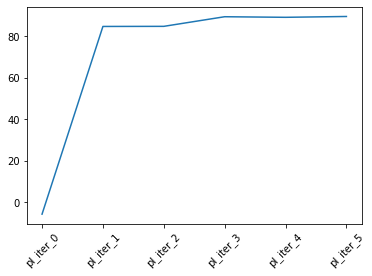

In [8]:
pl_cols_03 = [col for col in Qmatrix_03.columns if 'pl' in col]
Qmatrix_03[pl_cols_03].sum().plot(rot=45);

In [9]:
Qmatrix_03[pl_cols_03].sum()

pl_iter_0    -5.66
pl_iter_1    84.70
pl_iter_2    84.75
pl_iter_3    89.38
pl_iter_4    89.10
pl_iter_5    89.50
dtype: float64

# Conclusion
As result model has been learned successfully. It has brought positive PL = 72.83  on first iteration. The model initialized and learned on 2020-01-02 only got top result PL = 89.50 what is 22 % greater than test results for model with fixed period 5.